In [3]:
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime, timedelta 
import seaborn as sns
import pandas as pd

In [4]:
covid=pd.read_csv('owid-covid-data.csv', sep=',')
covid['date'] = pd.to_datetime(covid['date'])

In [452]:
covid_France=covid.loc[covid['iso_code']=='FRA']

Text(0, 0.5, 'Number of cases in million')

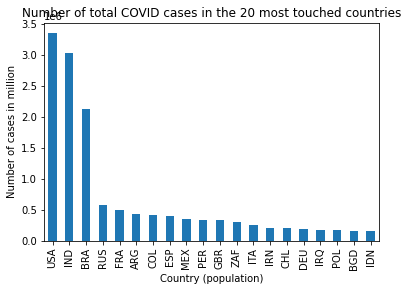

In [515]:
covid_iso_code_total_cases= covid.loc[:,['iso_code','total_cases', 'population']].dropna().sort_values(by=['total_cases','population'], ascending=True)
covid_iso_code_total_cases= covid_iso_code_total_cases[covid_iso_code_total_cases.iso_code !='OWID_WRL']
covid_iso_code_total_cases_plot= covid_iso_code_total_cases.groupby(['iso_code'])['total_cases'].std()
(covid_iso_code_total_cases_plot.sort_values(ascending= False).head(20).plot(kind='bar', title='Number of total COVID cases in the 20 most touched countries'))
plt.xlabel('Country (population)')
plt.ylabel('Number of cases in million')

#This barplot gives the number of COVID cases in the 20 most touched by COVID coutries in the world, ordered by total of cases and then amount of population: we can see that the US are by far the most touched, even before india which has a bigger population. this highlights the countries that are the most touched. I used an ordered bar plot because it is good to represent multiple categories on the same referential, and it is relevant in order to compare countries between them.

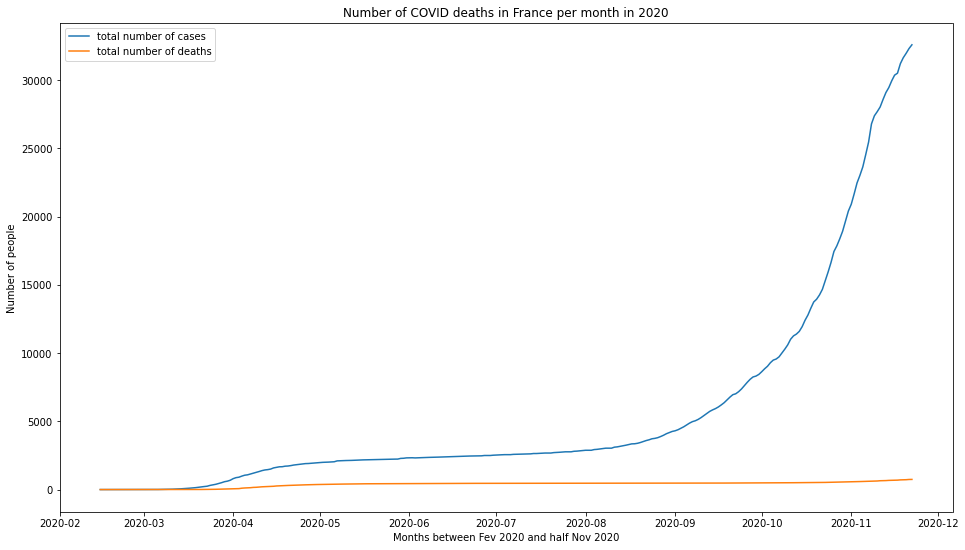

In [471]:
covid_France_date_total_cases=covid_France.loc[:,['date','total_cases_per_million','total_deaths_per_million']].dropna()
dates=covid_France_date_total_cases['date']
values=covid_France_date_total_cases['total_cases_per_million']
values2=covid_France_date_total_cases['total_deaths_per_million']
plt.figure(figsize=(16,9))
plt.title('Number of COVID deaths in France per month in 2020')
plt.ylabel('Number of people')
plt.xlabel('Months between Fev 2020 and half Nov 2020')
plt.plot(dates, values, label='total number of cases')
plt.plot(dates, values2, label = "total number of deaths")
plt.legend()
plt.show()

#This chart shows the number of covid cases in France each month in 2020 in blue, and the number of covid deaths in France during 2020 in orange. We can see that the virus is following a nearly exponential curve, which is very typical of pandemics. On the other side, in france, the number of deaths in france in 2020 seems to be stable at less than half a million, while the number of cases keeps on growing up. This could be mean a lot of different things: that the majority of the population is not dying from covid, that the covid is having a second peak, etc. I used a line plot because it is good to show an evolution in time, and it is relevant to see this kind of continues datas.

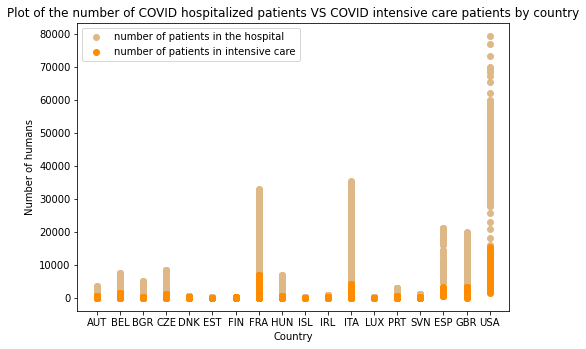

<Figure size 1152x648 with 0 Axes>

In [519]:
covid_hosp_patients_icu_patients=covid.loc[:,['hosp_patients','icu_patients','iso_code']].dropna()
hosp_patients= covid_hosp_patients_icu_patients['hosp_patients']
icu_patients= covid_hosp_patients_icu_patients['icu_patients']
iso_code= covid_hosp_patients_icu_patients['iso_code']
fig=plt.figure()
plt.figure(figsize=(16,9))
ax=fig.add_axes([0,0,1,1])
ax.scatter(iso_code,hosp_patients, color='burlywood', label= 'number of patients in the hospital')
ax.scatter(iso_code,icu_patients, color='darkorange', label= 'number of patients in intensive care')
ax.set_xlabel('Country')
ax.set_ylabel('Number of humans')
ax.set_title('Plot of the number of COVID hospitalized patients VS COVID intensive care patients by country')
ax.legend()
plt.show()

#This plot highlights the cases of Danemark, Estonia, Finland, Island, Irland, Luxembour and Slovenia: they have almost as much patients in hospital than in intensive care for COVID. Why is that? I used a plot with points in order to compare two different types of datas on the same referential, and it seems relevant to highlight the difference between the number of patients in intensive care and in hospitals.

Text(0.5, 1.0, 'Correlation between the total number of cases and the total number of deaths of COVID per million')

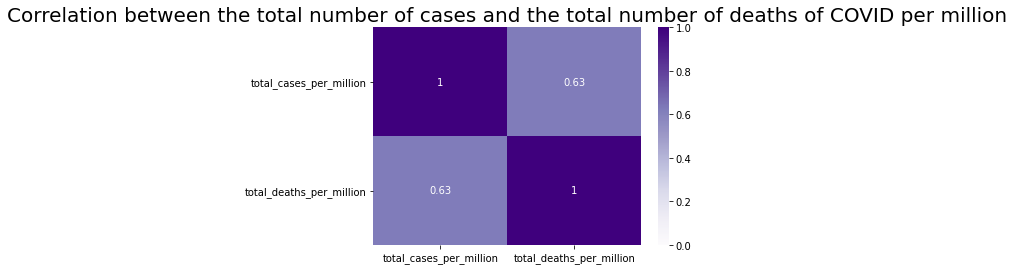

In [299]:
covid_total_cases_per_million_total_deaths_per_million= covid.loc[:,['total_cases_per_million','total_deaths_per_million']].dropna()
sns.heatmap(covid_total_cases_per_million_total_deaths_per_million[['total_cases_per_million', 'total_deaths_per_million']].corr(), vmin=0, cmap= 'Purples', annot= True)
plt.title('Correlation between the total number of cases and the total number of deaths of COVID per million', fontsize = 20) 

#This heatmap means that the total number of cases and the total number of deaths are correlated by 0.63 : when the total number of cases by COVID increases, the total number of death by COVID increases two but a little less. It's normal that the correlation of total cases of COVID with itself makes 1, because they are the same. I used a heatmap because it is not so difficult to read, and it is clear. Moreover, it is a good tool to play with correlations. It is relevant to illutrative the correlation.

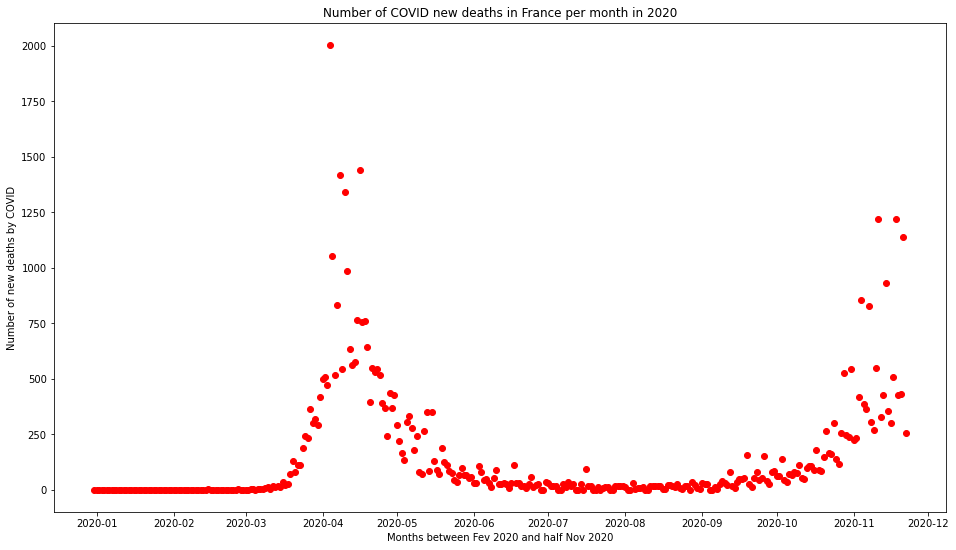

In [516]:
covid_France_handwashing_facilities_new_cases= covid_France.loc[:,['new_deaths','date']]
a=covid_France_handwashing_facilities_new_cases['new_deaths']
b=covid_France_handwashing_facilities_new_cases['date']


plt.figure(figsize=(16,9))
plt.title('Number of COVID new deaths in France per month in 2020')
plt.ylabel('Number of new deaths by COVID')
plt.xlabel('Months between Fev 2020 and half Nov 2020')
plt.scatter(b,a,c='red')
plt.show()


#This point plot represents the number of new deaths of covid in France per month in 2020. It highlights that there were 2 peaks of new deaths waves in france: one in april, and one in november, which correspond to the new lockdowns, and justify the lockdowns. It is relevant to see the different peaks.

Text(0.5, 1.0, 'Correlation between the total number of COVID cases and the number of handwashing facilities')

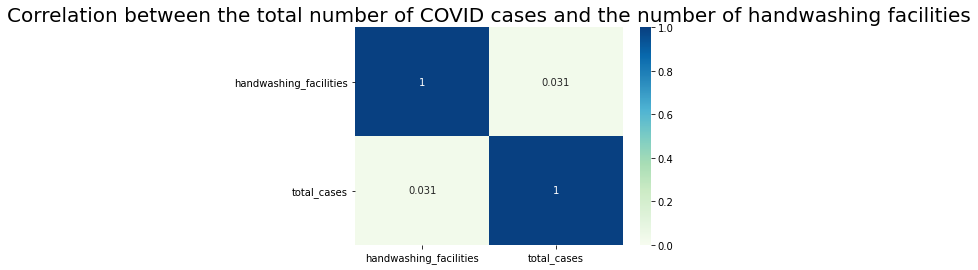

In [517]:
covid_cardiovasc_death_rate_total_deaths=covid.loc[:,['handwashing_facilities','total_cases']]
sns.heatmap(covid_cardiovasc_death_rate_total_deaths[['handwashing_facilities', 'total_cases']].corr(), vmin=0, cmap= 'GnBu', annot= True)
plt.title('Correlation between the total number of COVID cases and the number of handwashing facilities', fontsize = 20) 

#This heatmap represents the correlation between the total number of covid cases, and the number of handwashing facilities. I supposed that the fact of having more handwashing facilities would be correlated to less cases, but that's not the case. This shows that the number of handwashing facilities available does not impact the number of cases of COVID, which force us to look somwhere else to find the true help to lower the COVID rates

No handles with labels found to put in legend.


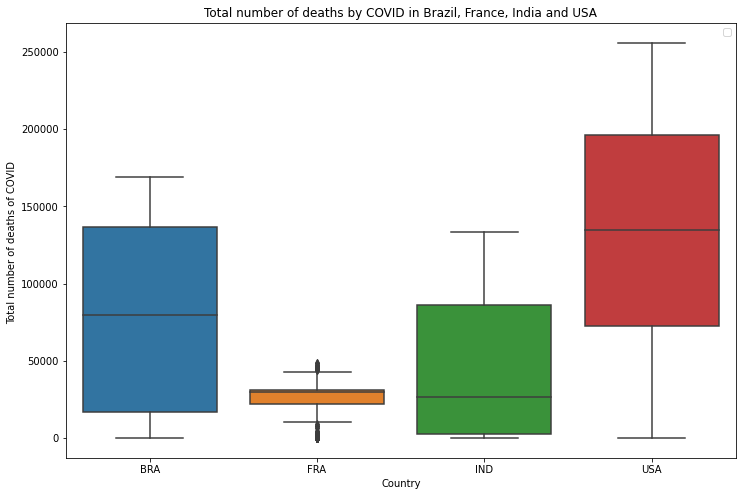

In [450]:
covidFU= covid.loc[covid['iso_code'].isin(['FRA','USA','IND','BRA'])]
a=sns.boxplot(x= covidFU['iso_code'], y=covidFU['total_deaths'])
a.figure.set_size_inches(12,8)
a.set_title('Total number of deaths by COVID in Brazil, France, India and USA')
a.set_xlabel('Country')
a.set_ylabel('Total number of deaths of COVID ')
a.legend()
plt.show(a)


#This boxplot shows the total number of deaths by COVID in different contries. It shows how the number of deaths by COVID in the USA are much higher than the ones of other countries who had big loses because of COVID two. We can see how countries like India or brazil have been experiencing ups and downs, leading to large boxes, while france seems more regular, and has a finer box. I used boxplot because i wanted to show indices like the higher and the lower number of deaths in each country and the median, in order to have a better comparativ vision for different countries. It is relevant to see more indices than the other vizualisations. 
